# Análise PC do laboratório

Análise feita usando o Computador do laboratório de informática. Configurações da máquina:
- SO: Zorin OS 17.2 Core 64bits 
- Modelo de hardware: Dell Inc. OptiPlex 3080
- Memória ram: 16 GB
- Processador: Intel® Core™ i3-10100T CPU @ 3.00GHz × 8
- Placa de vídeo: Mesa Intel® UHD Graphics 630 (CML GT2)
- Disco rígido: 256.1 GB


## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Procurando números primos

### Criando Dataset

In [2]:
df_primos = pd.read_csv("dataset-primos.csv")

In [3]:
df_primos = df_primos.sort_values(by="NumThreads")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-primos.csv"
df_primos.to_csv(output_file, index=False)

# Salvando dataset no excel
df_primos.to_excel('dataset_primos.xlsx')

### Questão 1

#### a)

In [4]:
# Ordenar os dados pelo número máximo de primos
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
uso_cpu = df_primos_qt_01.sort_values(by="MeanUtilization", ascending=True)

uso_cpu = uso_cpu[["NumThreads", "MeanUtilization"]]
display(uso_cpu.style.hide(axis='index'))

NumThreads,MeanUtilization
2,0.253655
4,0.507399
6,0.751138
10,0.979317
12,0.985529
20,0.987724
14,0.991642
16,0.992555
18,0.993064
8,0.993400


É possível perceber que aumento proporcional que o número de threads causa inicialmente no uso da CPU, visto que de duas em duas threads, o aumento no uso da CPU aumenta 25%. Entretanto, ao chegar a marca de 8 threads o uso da CPU passa a ser de 99% e se mantém em variâncias de 99% a 98%, até chegar em 100% de uso com 24 threads e se manter assim conforme o número de threads aumenta. 

O comportamento inicial até o uso de 8 threads indica boa escalabilidade da CPU e paralelização. No entanto, após atingir o limite de núcleos da CPU, a utilização da CPU se estabiliza em 100%, indicando que não há mais ganho de desempenho com o aumento do número de threads. 

O Gráfico 1 demonstra melhor como ficou o resultado geral:


##### Gráfico 1

C:\Users\bruns\AppData\Local\Temp\ipykernel_19080\976455221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primos_qt_01["MeanUtilizationPercent"] = df_primos_qt_01["MeanUtilization"] * 100


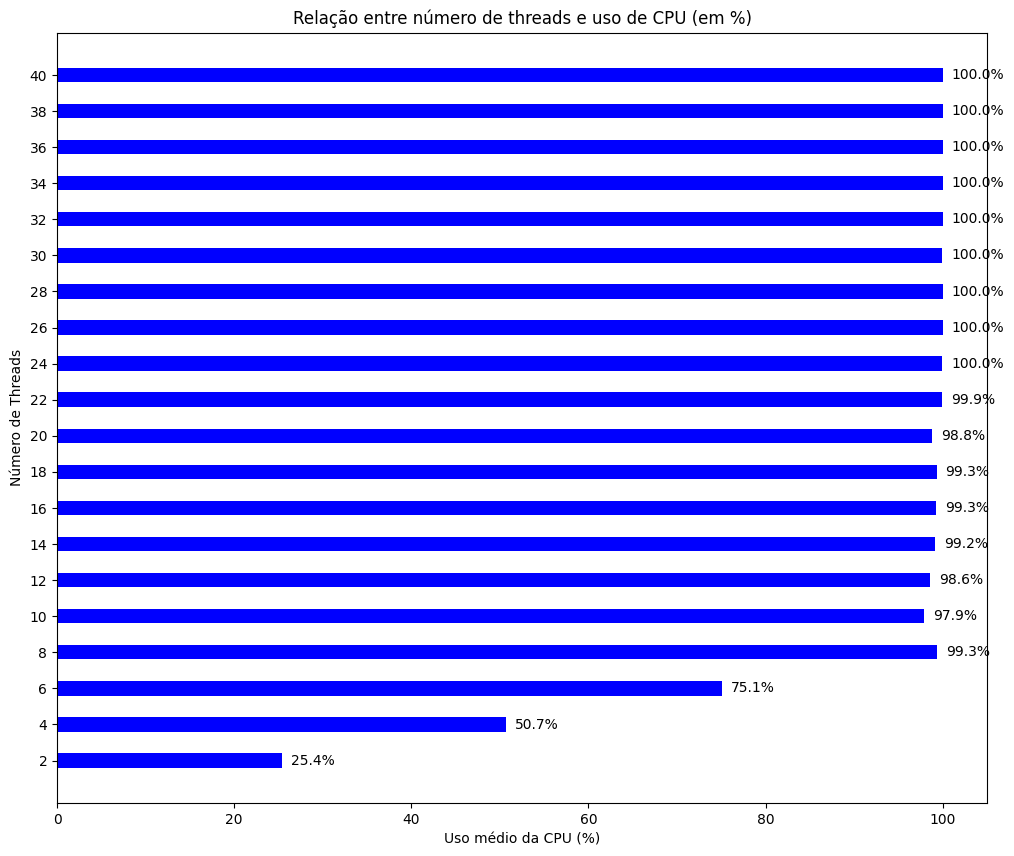

In [5]:
# Convertendo valores para porcentagem
df_primos_qt_01["MeanUtilizationPercent"] = df_primos_qt_01["MeanUtilization"] * 100

plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["MeanUtilizationPercent"], color='b')

for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width():.1f}%',  # Valor formatado como porcentagem
        va='center'
    )

num_threads = df_primos_qt_01["NumThreads"]

plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))
plt.title("Relação entre número de threads e uso de CPU (em %)")
plt.xlabel("Uso médio da CPU (%)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_uso_cpu.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


#### b)

In [6]:
# Ordenar os dados pelo número de threads
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
temp_total_exec = df_primos_qt_01.sort_values(by="ElapsedTime", ascending=True)

# Exibir apenas as colunas desejadas
temp_total_exec = temp_total_exec[["NumThreads", "MeanUtilization","ElapsedTime"]]
display(temp_total_exec.style.hide(axis='index'))

NumThreads,MeanUtilization,ElapsedTime
40,1.000000,5218
38,1.000000,5251
32,1.000000,5293
36,1.000000,5311
30,0.999592,5355
20,0.987724,5378
18,0.993064,5415
34,0.999792,5454
26,0.999792,5456
28,1.000000,5485


O aumento do número de threads inicialmente reduz o tempo total de execução, melhorando a utilização da CPU e aproveitando os recursos de forma mais eficaz. No entanto, após atingir uma certa quantidade de threads, o tempo de execução se estabiliza devido à saturação dos recursos do sistema.

A seguir o Gráfico 2 demonstra visualmente como o aumento de threads diminuí o tempo de execução do código:


##### Gráfico 2

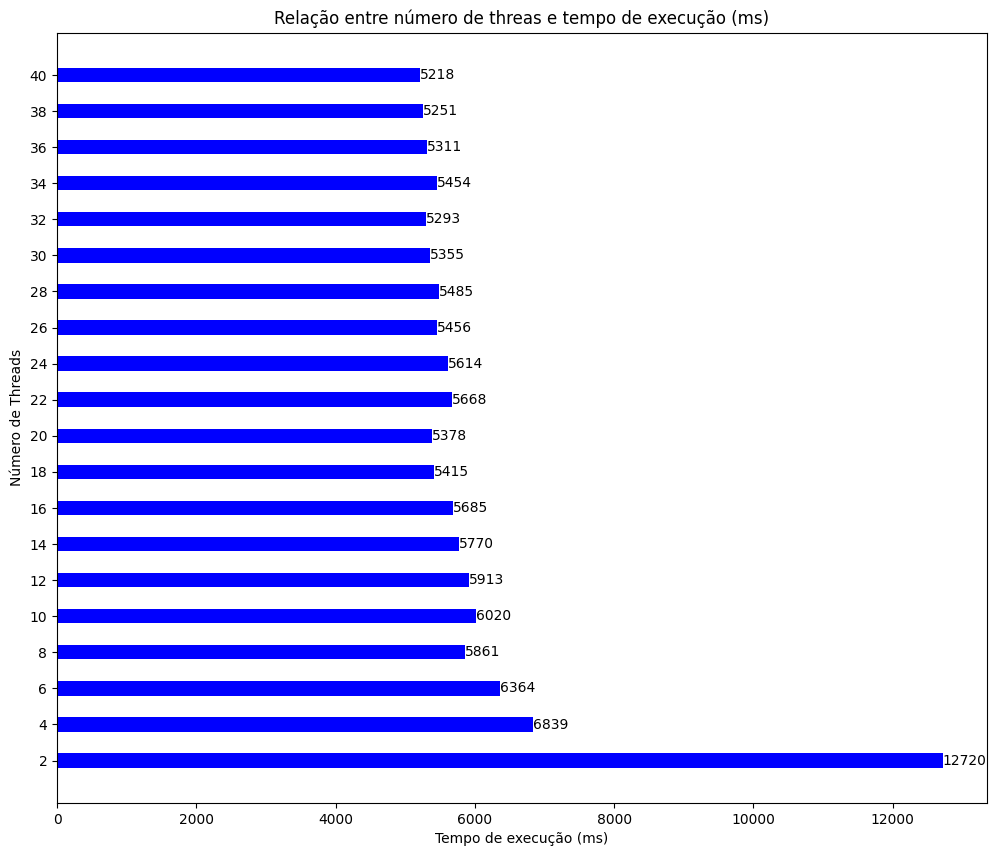

In [7]:
plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["ElapsedTime"], color='b')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width()}',  # Valor formatado como porcentagem
        va='center'
    )

# Espaçamento entre as barras
num_threads = df_primos_qt_01["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

plt.title("Relação entre número de threas e tempo de execução (ms)")
plt.xlabel("Tempo de execução (ms)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_temp_execucao.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


#### c)

A quantidade que demonstra ser mais adequada, trata-se de 20 threads pois o consumo de CPU fica em torno dos 98% e possui um ótimo tempo de execução de 5378ms, demonstrando usar muito bem os recursos do sistema a seu favor.

### 2    

#### a)

In [8]:
# Ordenar os dados pelo número de threads
df_primos_qt_02 = df_primos[df_primos["NumThreads"]==20]
temp_exec = df_primos_qt_02.sort_values(by="ElapsedTime", ascending=True)

temp_exec = temp_exec[["NumeroMaximo","ElapsedTime"]]
display(temp_exec.style.hide(axis='index'))

NumeroMaximo,ElapsedTime
10000,68
20000,222
30000,444
40000,784
50000,1157
60000,1751
70000,2283
80000,2920
90000,3782
100000,4600


Afeta de maneira linear como é possível observar em gráficos. A maneira como a progressão se dá de 10000 até 110000 é proporcional e até mesmo linear, o que indica um bom uso dos recursos do sistema e bom desempenho. Entretanto, quando chega em 220000, a progressão deixa de ser linear e problemas de desempenho são apresentados, possivelmente causados por sobrecarga de recursos, complexidade algorítmica e uma escalabilidade limitada.

A seguir os Gráficos 3 e 4 com os resultados usados para essa análise:


##### Gráficos 3 e 4

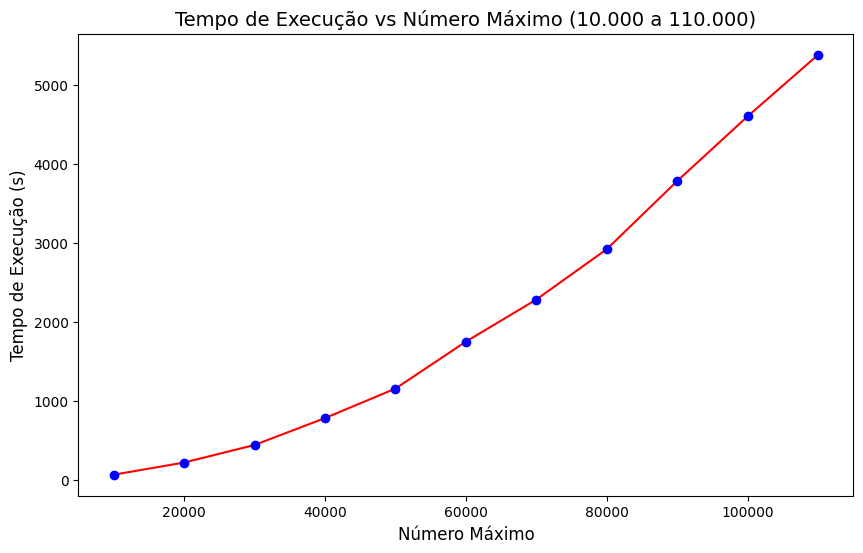

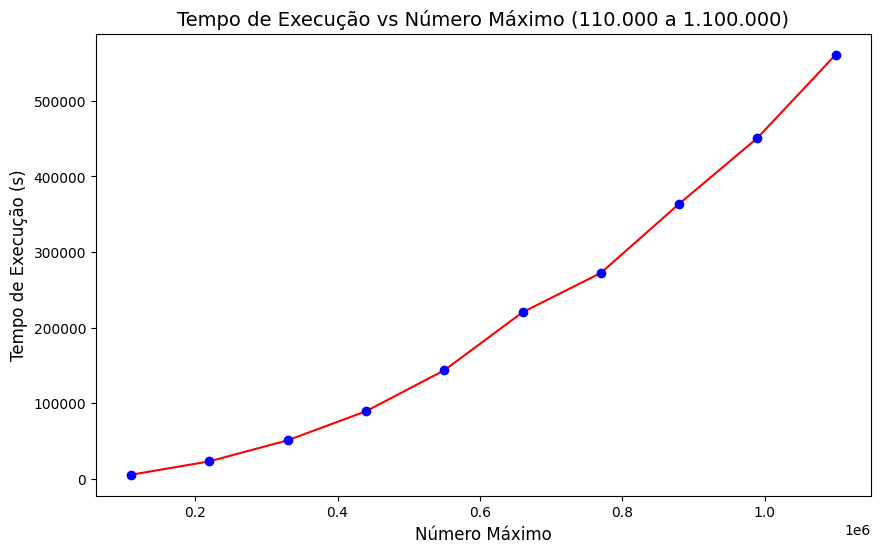

In [9]:
df_intervalo1 = temp_exec[temp_exec["NumeroMaximo"] <= 110000]  # Valores menores ou iguais a 110000
df_intervalo2 = temp_exec[temp_exec["NumeroMaximo"] >= 110000]  # Valores maiores ou iguais a 110000

df_intervalo1 = df_intervalo1.sort_values(by="ElapsedTime", ascending=True)

# Gerar o primeiro gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='red', label='Linha de Execução')
plt.scatter(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (10.000 a 110.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

df_intervalo2 = df_intervalo2.sort_values(by="ElapsedTime", ascending=True)

# Gerar o segundo gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='red', label='Linha de Execução')
plt.scatter(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (110.000 a 1.100.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_02.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

## Fazendo acessos à memória

### Criando dataset

In [10]:
df_memoria = pd.read_csv("dataset-memoria.csv")

### Reorganizando o Dataset a partir do tamanho da memória acessa

In [11]:
df_memoria = df_memoria.sort_values(by="KBinMemory")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-memoria.csv"
df_memoria.to_csv(output_file, index=False)

# Salvando dataset no excel
df_memoria.to_excel('dataset_memoria.xlsx')

### Questão 1

#### a)

In [12]:
tempo_busca = df_memoria.sort_values(by="SearchTime",ascending=True)
tempo_busca = tempo_busca[["KBinMemory","SearchTime"]]

display(tempo_busca.style.hide(axis='index'))

KBinMemory,SearchTime
1024,1776
10240,4103
20480,4968
30720,5316
51200,5456
40960,5594
61440,5630
71680,5692
81920,5725
92160,5741


O tempo aumenta à medida que o tamanho do array aumenta, mas não de maneira linear, tendo inicialmente um crescimento mais acentuado, mas que se estabiliza quando se atinge valores maiores, possivelmente indicando à transição do uso de cache da CPU para acessos à memória principal (RAM), que são mais lentos.

Segue-se os Gráficos 5 e 6 para um melhor entendimento do resultado:


##### Gráficos 5 e 6

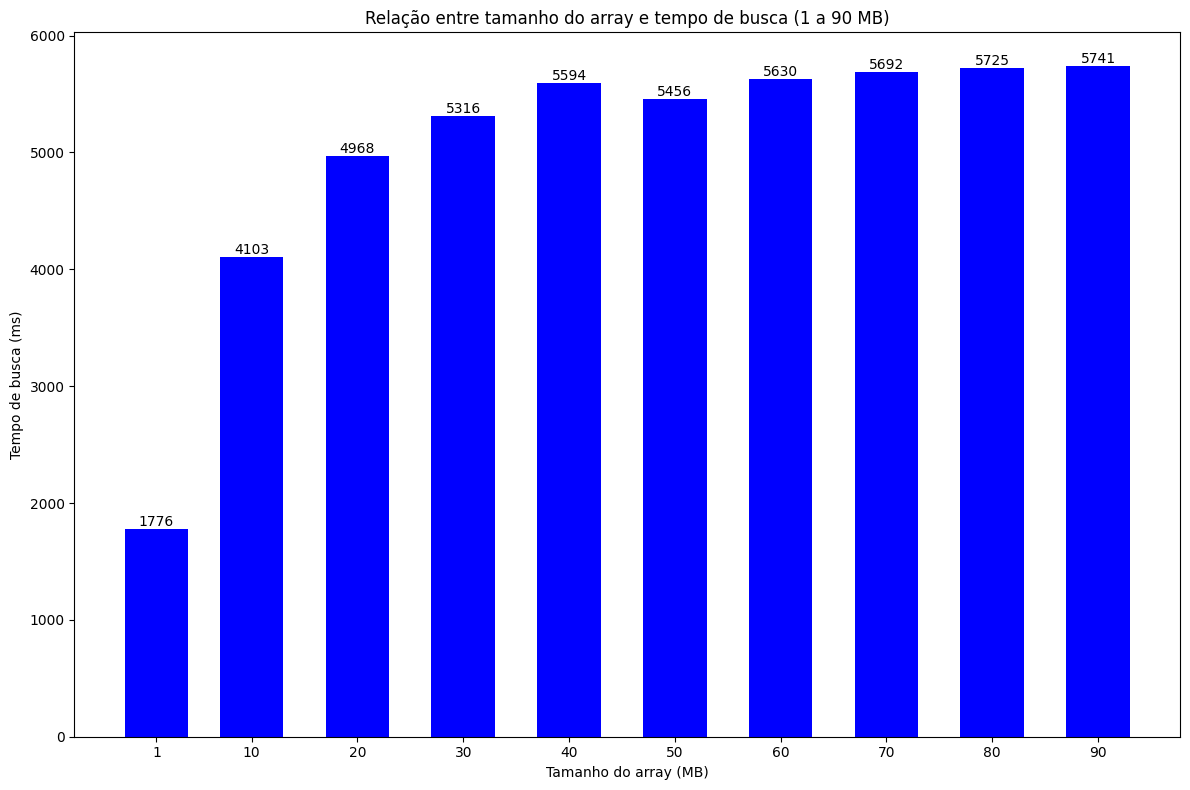

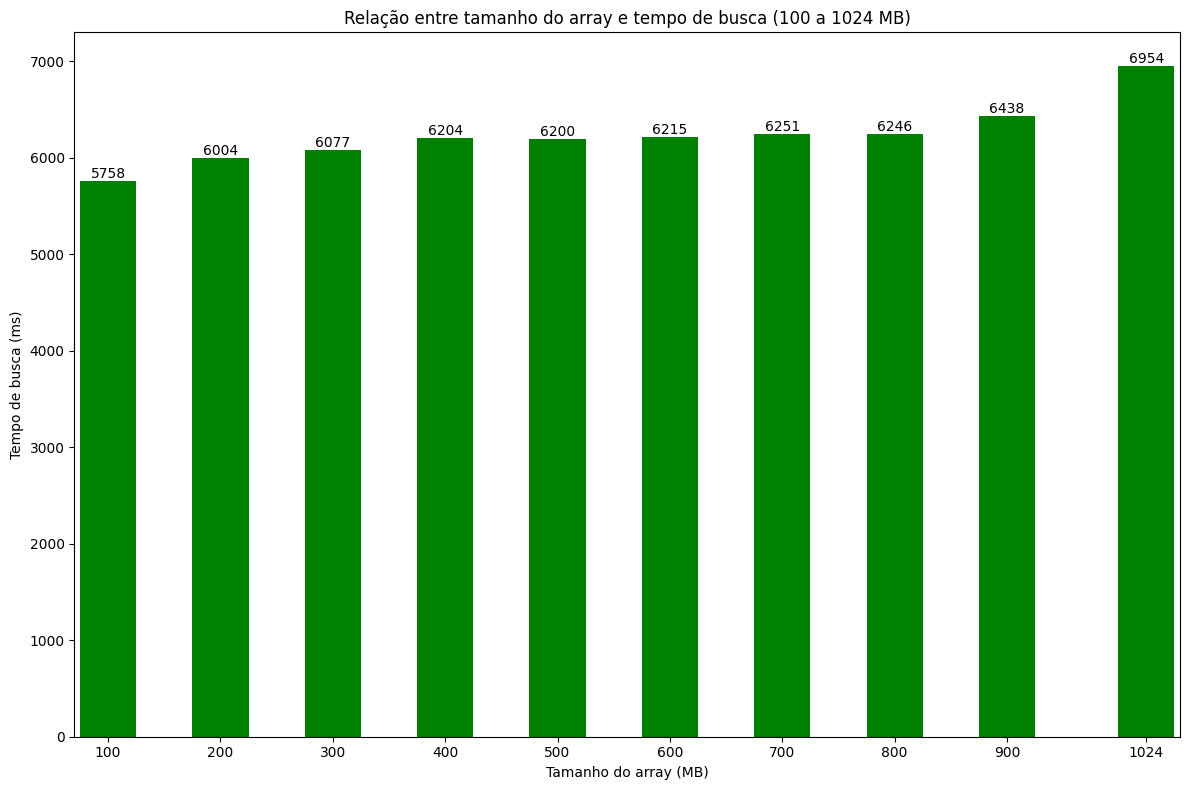

In [13]:
tempo_busca["MBinMemory"] = df_memoria["KBinMemory"] / 1024

# Separando os dados em dois subconjuntos:
df1 = tempo_busca[tempo_busca["MBinMemory"] <= 90]  # Valores de 1 a 90
df2 = tempo_busca[tempo_busca["MBinMemory"] >= 100]  # Valores de 100 até 1024

# Gráfico com valores de 1 a 90
plt.figure(figsize=(12, 8))
bars1 = plt.bar(df1["MBinMemory"], df1["SearchTime"], width=6, color='b')
plt.title("Relação entre tamanho do array e tempo de busca (1 a 90 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks([1] + list(range(10, 91, 10)))

for bar in bars1:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10) 

plt.tight_layout()

plt.savefig('grafico_escalabilidade_array_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

# Gráfico com valores de 100 a 1024
plt.figure(figsize=(12, 8))
bars2 = plt.bar(df2["MBinMemory"], df2["SearchTime"], width=50, color='g')
plt.title("Relação entre tamanho do array e tempo de busca (100 a 1024 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks(list(range(100, 1000, 100)) + [1024])
plt.xlim(70, 1054)

for bar in bars2:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  
    
plt.savefig('grafico_escalabilidade_array_02.jpeg', format='jpeg', bbox_inches='tight')
    
plt.tight_layout()
plt.show()

#### b)

O aumento do tempo de busca no array não é perfeitamente bem comportado, embora apresente uma tendência geral de crescimento com o tamanho do array. O sistema exibe um comportamento relativamente escalável para tamanhos grandes, mas existem mudanças mais bruscas em certos pontos, principalmente nos tamanhos menores do array. Essas variações podem ser atribuídas à hierarquia de memória: arrays menores podem caber no cache da CPU, enquanto arrays maiores exigem mais acessos à memória RAM, resultando em aumentos significativos no tempo de busca.
	
Para tamanhos muito grandes, o impacto do crescimento no tempo de busca se estabiliza, sugerindo que o sistema lida melhor com acessos à memória principal, mas ainda apresenta picos que indicam desafios na escalabilidade em situações específicas.
